In [7]:
import numpy as np
import csv
import math
import matplotlib.pyplot as plt
import itertools
import pandas as pd

[[0.0, 1.0], [-0.9987954562051724, -0.04906767432741801]]


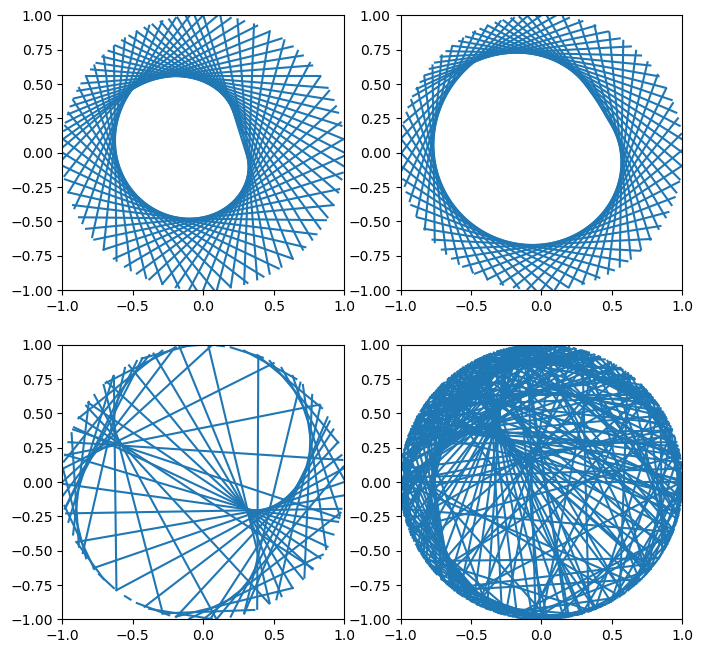

In [8]:
from decimal import *
import matplotlib.lines as mlines
import pickle

def log2(number: Decimal) -> Decimal:
    return number.ln()/Decimal(2).ln()


def get_row(number: Decimal) -> Decimal:
    return round_down(log2(number))


def get_col(row: Decimal, number: Decimal) -> Decimal:
    return (number - (2**row + 1)) // 2


def get_row_count(row: Decimal) -> Decimal:
    return (2**(row+1)-2**row)//2


def round_down(number: Decimal) -> Decimal:
    return number.quantize(Decimal('1.'), rounding=ROUND_DOWN)


def rotate(vec_s: float,vec_e: float, radians: float):
    ca = math.cos(radians)
    sa = math.sin(radians)
    x = (vec_s * ca) - (vec_e * sa)
    y = (vec_s * sa) + (vec_e * ca)
    return (x, y)


def get_location(number: Decimal, radius: float=1):
    return rotate(0.0, radius, get_number_angle(number))


def get_number_angle(number: Decimal):
    if number == 1:
        return 0
    elif number == 3:
        return math.pi
    elif number == 5:
        return math.pi*3/2
    elif number == 7:
        return math.pi/2
    else:
        row = get_row(number)
        col = get_col(row, number)
        return (Decimal(2*math.pi)*col)/get_row_count(row)

def line(ax, x1, y1, x2, y2):
    ax.add_line(mlines.Line2D([x1,x2], [y1,y2]))


subplot_size=4
subplot_cols=2
subplot_rows=2

fig, ax = plt.subplots(subplot_rows, subplot_cols, figsize=(subplot_size*subplot_cols,subplot_size*subplot_rows), dpi=100)
ax = ax.flatten()

def dreamcatcher(ax, func):
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])

    line_coordinates = None

    height=8

    for i in range(1, 2**height, 2):
        if get_row(Decimal(i))<7:
            continue
        x1, y1=get_location(Decimal(i))
        x2, y2=get_location(func(Decimal(i)))
        
        if line_coordinates == None:
            line_coordinates = [[[x1, y1], [x2, y2]]]
            
        else:    
            line_coordinates.append([[x1, y1], [x2, y2]])
        
        line(ax, x1, y1, x2, y2)
    
    return line_coordinates

def dreamcatcher_prime(ax):
    infile = open('primes_179424673.bin', 'rb')
    primes = pickle.load(infile)
    infile.close()

    line_coordinates = None

    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])

    for i in range(len(primes)):
        if len(primes)<=i**2:
            break
        x1, y1 = get_location(primes[i])
        x2, y2 = get_location(primes[i**2])
        line(ax, x1, y1, x2, y2)

        if line_coordinates == None:
            line_coordinates = [[[x1, y1], [x2, y2]]]
            
        else:    
            line_coordinates.append([[x1, y1], [x2, y2]])
        
        line(ax, x1, y1, x2, y2)
    
    return line_coordinates


line_coordinates = dreamcatcher(ax[0], lambda number: number*10)
print(line_coordinates[0])

dreamcatcher(ax[1], lambda number: number*19)
dreamcatcher(ax[2], lambda number: number**3)

infile = open('primes_179424673.bin', 'rb')
primes = pickle.load(infile)
infile.close()

ax[3].set_xlim([-1,1])
ax[3].set_ylim([-1,1])

for i in range(len(primes)):
    if len(primes)<=i**2:
        break
    x1, y1 = get_location(primes[i])
    x2, y2 = get_location(primes[i**2])
    line(ax[3], x1, y1, x2, y2)

plt.show()


In [9]:
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       return -1
       #raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return [x, y]

def get_intersections(line_coordinates):
    intersections = None

    for i in range(len(line_coordinates)-2):
        
        return_value = line_intersection((line_coordinates[i-1][0], line_coordinates[i-1][1]),(line_coordinates[i][0], line_coordinates[i][1]))
        if return_value != -1:
            if intersections == None:
                
                intersections = [return_value]
            else:
                intersections.append(return_value)

    return intersections

def get_xy_intersection(intersections):
    intersection_x = None
    intersection_y = None

    for i in intersections:
        if intersection_x == None:
            intersection_x = [i[0]]
            intersection_y = [i[1]]
        
        else:
            #print[i]
            intersection_x.append(i[0])
            intersection_y.append(i[1])

    return intersection_x, intersection_y

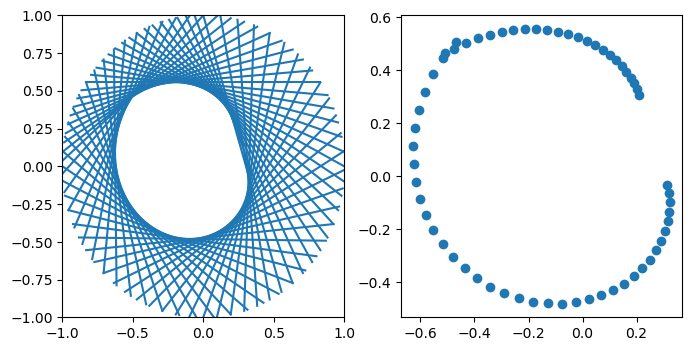

In [10]:
#calc line intersection

subplot_size=4
subplot_cols=2
subplot_rows=1

fig, ax = plt.subplots(subplot_rows, subplot_cols, figsize=(subplot_size*subplot_cols,subplot_size*subplot_rows), dpi=100)
ax = ax.flatten()

line_coordinates = dreamcatcher(ax[0], lambda number: number*10)
# line_coordinates = dreamcatcher(ax[0], lambda number: number**2)
# line_coordinates = dreamcatcher(ax[0], lambda number: number*19)
# line_coordinates = dreamcatcher(ax[0], lambda number: number**3)
# line_coordinates = dreamcatcher_prime(ax[0])


# infile = open('primes_179424673.bin', 'rb')
# primes = pickle.load(infile)
# infile.close

intersections = get_intersections(line_coordinates)

intersection_x, intersection_y = get_xy_intersection(intersections)

ax[1].scatter(intersection_x, intersection_y)

plt.show()

